# OBJECTIVE:
                      1)Applied Decision Trees on Different Featurization of Data viz tfidf, Avg-W2V and AVGtf-idf-W2V
                      2)Finding the best depth by using cross validation 
                      3)To find the precision score,recall score and f1 score for the best alpha in both cv and test.

In [102]:
import sqlite3
import pandas as pd
import numpy as np
con=sqlite3.connect("database.sqlite")
data=pd.read_sql_query("""SELECT * FROM Reviews WHERE Score !=3""",con)
def partitions(x):
    if x < 3:
        return "negative"
    return "positive"
score=data["Score"]
positive_negative=score.map(partitions)
data["Score"]=positive_negative
#Here I am just sorting the data
sorted_data=data.sort_values("ProductId",ascending=True,inplace=False,na_position="last")
#Here I am dropping the fake reviews (repeated reviews)
Final_data=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)
#Again I am filtering the data by using this condition
Final_data=Final_data[Final_data.HelpfulnessNumerator <= Final_data.HelpfulnessDenominator]
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
import re
##functions to clean html and punctuation
stop=set(stopwords.words("english"))#set stop words  
snow=nltk.stem.SnowballStemmer("english")    #its give the stem word of particular word(eg:happy--happi)
def clearhtml(sentence):#In cleanhtml function we taking all the html tag by using regular expression
    cleanr=re.compile("<.*?>")
    clean=re.sub(cleanr," ",sentence)
    return clean
def clearpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned
#here we just filtered the reviews ie:preprocessing the data
#1)clean the html tags in whole Final_data["Text"]
#2)clean the punctuation in whole Final_data["Text"] by word by word('w')
#3)check whether its alphabet or not and also length of the word should be more than 2
#4)And change it into lower case and check  those words are not in stop word if its in stopwords its eliminate it
#5)And we stemming each word and encode it

i=0
str=' '
clean_string=[]
positive_word=[]
negative_word=[]
for stem in Final_data["Text"]:
    Filtered_word=[]
    stem=clearhtml(stem)
    #print(stem)
    for word in stem.split():
        for clean_word in clearpunc(word).split():
            if clean_word.isalpha() and len(clean_word) >2:
                if clean_word.lower() not in stop:
                    s=snow.stem(clean_word.lower()).encode("utf8")
                    Filtered_word.append(s)
                    if (Final_data["Score"].values)[i] == "positive":
                        positive_word.append(s)
                    if(Final_data["Score"].values)[i]  == "negative":
                        negative_word.append(s)
                else:
                    continue
            else:
                continue
    str1=b" ".join(Filtered_word)
    clean_string.append(str1)
    i+=1
Final_data["cleaned_data"]=clean_string
Final_data["cleaned_data"]=Final_data["cleaned_data"].str.decode('utf8')
#sorting my dataframe in TBS
import datetime

Final_data["Time"] = Final_data["Time"].map(lambda t: datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))
sorted_data=Final_data.sort_values("Time",ascending=True,kind="quicksort",inplace=False,axis=0).reset_index(drop=True)


In [103]:
data_40k=sorted_data
data_40k['Score'].value_counts()
data_40k.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_data
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,1999-10-08 05:30:00,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,1999-10-25 05:30:00,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,1999-12-02 05:30:00,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,1999-12-06 05:30:00,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,2000-01-03 05:30:00,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [104]:
data_40k['Score'] = [1 if b=='positive' else 0 for b in data_40k['Score']]

In [85]:
data_40k

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_data
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,1999-10-08 05:30:00,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,1999-10-25 05:30:00,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,1999-12-02 05:30:00,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,1999-12-06 05:30:00,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,2000-01-03 05:30:00,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...
5,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,1,2000-01-09 05:30:00,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...
6,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,0,2000-01-19 05:30:00,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
7,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,1,2000-01-24 05:30:00,A sure death for flies,I bought a few of these after my apartment was...,bought apart infest fruit fli hour trap mani f...
8,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,1,2000-02-26 05:30:00,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,happen say name three time michael keaten star...
9,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,1,2000-06-03 05:30:00,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,get crazi look beatlejuic french version video...


In [105]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data_40k,data_40k['Score'],test_size=0.3,random_state=0,shuffle=False)
X_tr,X_cv,y_tr,y_cv=train_test_split(X_train,y_train,test_size=0.3,shuffle=False)
print(X_tr.shape)
print(X_test.shape)
print(X_cv.shape)
#print(y_train)

(178443, 11)
(109252, 11)
(76476, 11)


In [7]:
from gensim.models import Word2Vec    
from gensim.models import KeyedVectors

i=0
list_of_sent=[]
for sent in X_tr['cleaned_data'].values:
    list_of_sent.append(sent.split())

C:\Users\Admin\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=200, workers=4)
w2v_words=list(w2v_model.wv.vocab)

In [9]:
#print(list_of_sent)

# AVG W2V

In [10]:
Avg_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_tr['cleaned_data']: 
    sent_vec = np.zeros(200) # as word vectors are of zero length
    cnt_words =0; 
    for word in sent.split(): # for each word in a review/sentence
        #print(word)
        if word in w2v_words:
            vec = w2v_model.wv[word]#wv is used to convrt word into vector
            sent_vec += vec #we adding that vector into zeros[50]
            cnt_words += 1 #the valid vector increasing by 1
    if cnt_words != 0: #if its an valid vector
        sent_vec /= cnt_words
    Avg_w2v_train.append(sent_vec)
print(len(Avg_w2v_train))
print(len(Avg_w2v_train[0]))

178443
200


In [11]:
Avg_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_test['cleaned_data']: 
    sent_vec = np.zeros(200) # as word vectors are of zero length
    cnt_words =0; 
    for word in sent.split(): # for each word in a review/sentence
        #print(word)
        if word in w2v_words:
            vec = w2v_model.wv[word]#wv is used to convrt word into vector
            sent_vec += vec #we adding that vector into zeros[50]
            cnt_words += 1 #the valid vector increasing by 1
    if cnt_words != 0: #if its an valid vector
        sent_vec /= cnt_words
    Avg_w2v_test.append(sent_vec)
print(len(Avg_w2v_test))
print(len(Avg_w2v_test[0]))

109252
200


In [12]:
Avg_w2v_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_cv['cleaned_data']: 
    sent_vec = np.zeros(200) # as word vectors are of zero length
    cnt_words =0; 
    for word in sent.split(): # for each word in a review/sentence
        #print(word)
        if word in w2v_words:
            vec = w2v_model.wv[word]#wv is used to convrt word into vector
            sent_vec += vec #we adding that vector into zeros[50]
            cnt_words += 1 #the valid vector increasing by 1
    if cnt_words != 0: #if its an valid vector
        sent_vec /= cnt_words
    Avg_w2v_cv.append(sent_vec)
print(len(Avg_w2v_cv))
print(len(Avg_w2v_cv[0]))
#print(Avg_w2v_cv)

76476
200


In [13]:
np.isnan(Avg_w2v_train).any()

False

In [14]:
#print(mask)
#print(Avg_w2v_train)
from sklearn.preprocessing import StandardScaler
std_avg=StandardScaler(with_mean=False).fit(Avg_w2v_train)
X_train_stnd2=std_avg.transform(Avg_w2v_train)
X_test_stnd2=std_avg.transform(Avg_w2v_test)
X_cv_stnd2=std_avg.transform(Avg_w2v_cv)

In [15]:
#print(avg_vec_norm)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

DT = DecisionTreeClassifier()

param_grid = {'max_depth':range(1,30,4)} #params we need to try on classifier
gsv = GridSearchCV(DT,param_grid,cv=5,scoring="f1")
gsv.fit(X_train_stnd2,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
#gsv1=gsv.best_score_

Best HyperParameter:  {'max_depth': 9}
Best Accuracy: 92.71%


In [16]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
from sklearn import tree
from sklearn.externals.six import StringIO
clf1=DT.fit(X_train_stnd2,y_tr)
dot_data = StringIO()
cl=tree.export_graphviz(clf1,out_file=dot_data,max_depth=2) 

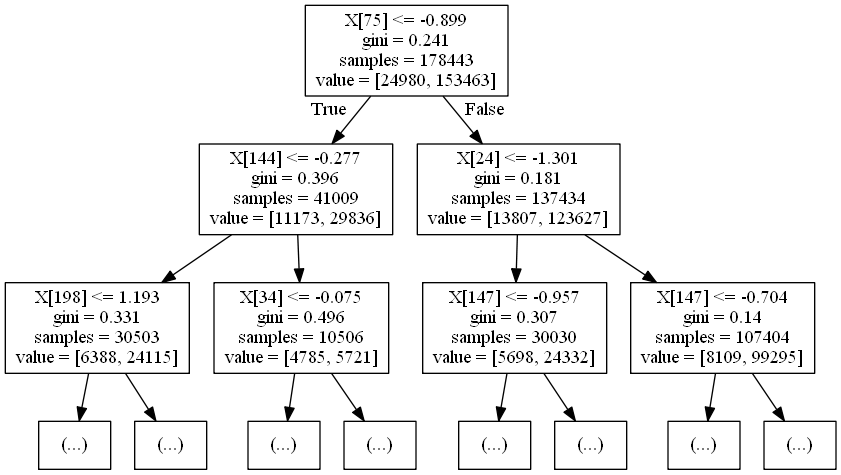

In [17]:
from IPython.display import Image
import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png()) 

In [18]:
mylist=list(range(1,30,4))
print(mylist)

[1, 5, 9, 13, 17, 21, 25, 29]


In [19]:
cv_score=[]
for k in mylist:# my list contains odd from 1 to 30
    clf=DecisionTreeClassifier(max_depth=k)
    score=cross_val_score(clf,X_train_stnd2,y_tr,cv=10,scoring="f1_micro")#here i am using my X and Y as X_tr and y_tr
    #print(score)
    cv_score.append(score.mean())#score gives as 10 score for each odd numbers so we should take score.mean()and store it in cv_score
import matplotlib.pyplot as plt
#print(cv_score)    
MSE=[1-x for x in cv_score]
optimal_k = mylist[MSE.index(min(MSE))]
print("K value in Kfold is:",optimal_k)
plt.plot(mylist,MSE)
for xy in zip(mylist, np.round(MSE,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("Number of max_depth")
plt.ylabel("Misclassification Error")
plt.title("Kfold for Avg w2v")
plt.show()

K value in Kfold is: 9


<Figure size 640x480 with 1 Axes>

Accuracy on CV set: 85.339%
Precision on CV set: 83.431
Recall on CV set: 85.339
F1-Score on CV set: 83.539
Confusion Matrix of CV set:
 [ [TN  FP]
 [FN TP] ]



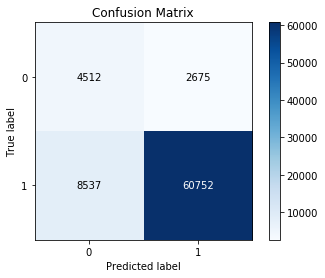

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(X_train_stnd2,y_tr)
y_pred = DT.predict(X_cv_stnd2)
print("Accuracy on CV set: %0.3f%%"%(accuracy_score(y_cv, y_pred)*100))
print("Precision on CV set: %0.3f"%(precision_score(y_cv, y_pred,average="weighted")*100))
print("Recall on CV set: %0.3f"%(recall_score(y_cv, y_pred,average="weighted")*100))
print("F1-Score on CV set: %0.3f"%(f1_score(y_cv, y_pred,average="weighted")*100))
print("Confusion Matrix of CV set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_cv)

Accuracy on test set: 84.862%
Precision on test set: 82.863
Recall on test set: 84.862
F1-Score on test set: 84.862
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



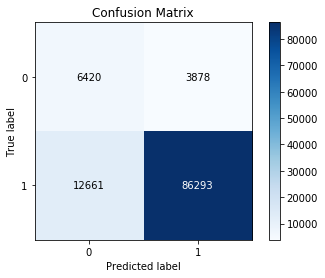

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(X_train_stnd2,y_tr)
y_pred = DT.predict(X_test_stnd2)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average="weighted")*100))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average="weighted")*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average="micro")*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_test)

# BOW

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vect=CountVectorizer(max_features=100000)
bow_vect_train=bow_vect.fit(X_tr["cleaned_data"])
bow_train=bow_vect.transform(X_tr["cleaned_data"].values)
bow_cv=bow_vect.transform(X_cv["cleaned_data"].values)
bow_test=bow_vect.transform(X_test["cleaned_data"].values)
print(bow_cv.shape)
print(bow_test.shape)
print(bow_train.shape)

(76476, 49468)
(109252, 49468)
(178443, 49468)


In [108]:
from sklearn.preprocessing import StandardScaler
std_bow=StandardScaler(with_mean=False).fit(bow_train)
std_bow_train=std_bow.transform(bow_train)
std_bow_test=std_bow.transform(bow_test)
std_bow_cv=std_bow.transform(bow_cv)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [109]:
#print(avg_vec_norm)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

DT = DecisionTreeClassifier()

param_grid = {'max_depth':range(1,30,4)} #params we need to try on classifier
gsv = GridSearchCV(DT,param_grid,cv=5,scoring="f1_micro")
gsv.fit(std_bow_train,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
#gsv1=gsv.best_score_

Best HyperParameter:  {'max_depth': 17}
Best Accuracy: 87.89%


In [110]:
data=bow_vect_train.get_feature_names()
#print(data)

In [111]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
from sklearn import tree
from sklearn.externals.six import StringIO
clf1=DT.fit(std_bow_train,y_tr)
dot_data = StringIO()
cl=tree.export_graphviz(clf1,out_file=dot_data,max_depth=2,feature_names=data,class_names=["positive","negative"]) 

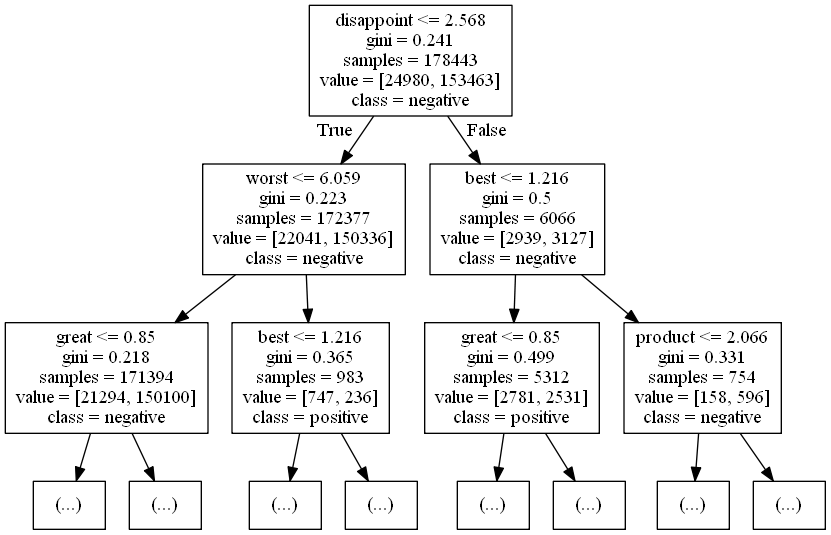

In [112]:
from IPython.display import Image
import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png()) 

K value in Kfold is: 17


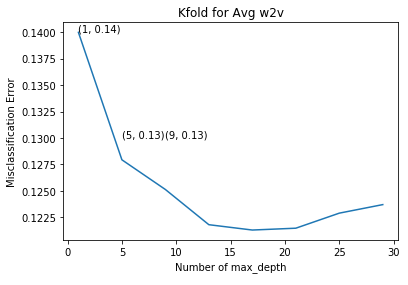

In [28]:
cv_score=[]
for k in mylist:# my list contains odd from 1 to 30
    clf=DecisionTreeClassifier(max_depth=k)
    score=cross_val_score(clf,std_bow_train,y_tr,cv=10,scoring="f1_micro")#here i am using my X and Y as X_tr and y_tr
    #print(score)
    cv_score.append(score.mean())#score gives as 10 score for each odd numbers so we should take score.mean()and store it in cv_score
import matplotlib.pyplot as plt
#print(cv_score)    
MSE=[1-x for x in cv_score]
optimal_k = mylist[MSE.index(min(MSE))]
print("K value in Kfold is:",optimal_k)
plt.plot(mylist,MSE)
for xy in zip(mylist, np.round(MSE,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("Number of max_depth")
plt.ylabel("Misclassification Error")
plt.title("Kfold for Avg w2v")
plt.show()

Accuracy on CV set: 86.049%
Precision on CV set: 84.711
Recall on CV set: 86.049
F1-Score on CV set: 86.049
Confusion Matrix of CV set:
 [ [TN  FP]
 [FN TP] ]



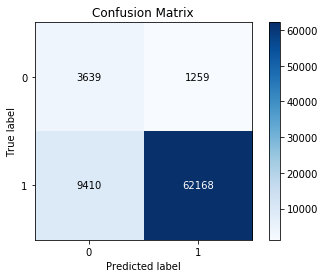

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(std_bow_train,y_tr)
y_pred = DT.predict(std_bow_cv)
print("Accuracy on CV set: %0.3f%%"%(accuracy_score(y_cv, y_pred)*100))
print("Precision on CV set: %0.3f"%(precision_score(y_cv, y_pred,average="weighted")*100))
print("Recall on CV set: %0.3f"%(recall_score(y_cv, y_pred,average="weighted")*100))
print("F1-Score on CV set: %0.3f"%(f1_score(y_cv, y_pred,average="micro")*100))
print("Confusion Matrix of CV set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_cv)

Accuracy on test set: 85.685%
Precision on test set: 84.386
Recall on test set: 85.685
F1-Score on test set: 85.685
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



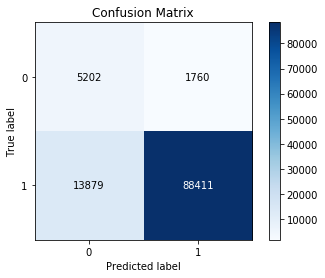

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(std_bow_train,y_tr)
y_pred = DT.predict(std_bow_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average="weighted")*100))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average="weighted")*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average="micro")*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_test)

# TFIDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer  #tf is calculated by no of wi occurs in rj/no of words in rj 
from sklearn.feature_extraction.text import TfidfVectorizer    #idf is calculated by no of docs/docs which contains wi                                                 
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=100000)#tfidf=tf*idf
final_tfidf = tf_idf_vect.fit(X_tr["cleaned_data"].values)
tfidf_train=tf_idf_vect.transform(X_tr["cleaned_data"])
tfidf_test=tf_idf_vect.transform(X_test["cleaned_data"])
tfidf_cv=tf_idf_vect.transform(X_cv["cleaned_data"])

In [32]:
from sklearn.preprocessing import StandardScaler
tfidf_std=StandardScaler(with_mean=False).fit(tfidf_train)
std_tf_train=tfidf_std.transform(tfidf_train)
std_tf_test=tfidf_std.transform(tfidf_test)
std_tf_cv=tfidf_std.transform(tfidf_cv)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

DT = DecisionTreeClassifier()

param_grid = {'max_depth':range(1,30,4)} #params we need to try on classifier
gsv = GridSearchCV(DT,param_grid,cv=5,scoring="f1")
gsv.fit(std_tf_train,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
#gsv1=gsv.best_score_

Best HyperParameter:  {'max_depth': 21}
Best Accuracy: 93.41%


In [59]:
data=final_tfidf.get_feature_names()
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
from sklearn import tree
from sklearn.externals.six import StringIO
clf1=DT.fit(std_tf_train,y_tr)
dot_data = StringIO()
cl=tree.export_graphviz(clf1,out_file=dot_data,max_depth=2,feature_names=data,class_names=['positive','negative']) 

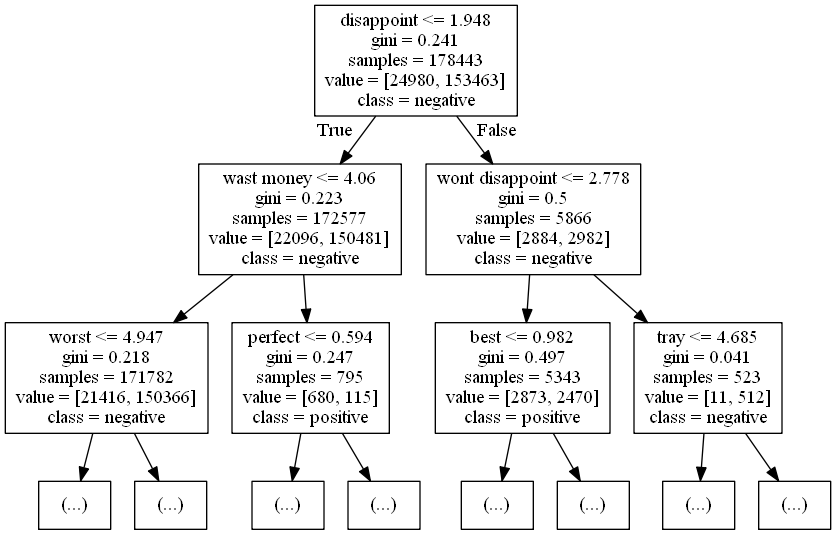

In [60]:
from IPython.display import Image
import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png()) 

[0.07526227311060119, 0.06960003511035029, 0.06807052619286691, 0.06625773532399837, 0.06589127007013373, 0.06568035248099025, 0.06603907504083639, 0.06667415438581448]
[0.9247377268893988, 0.9303999648896497, 0.9319294738071331, 0.9337422646760016, 0.9341087299298663, 0.9343196475190098, 0.9339609249591636, 0.9333258456141855]
K value in Kfold is: 21


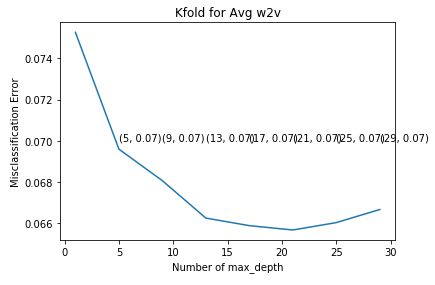

In [36]:
cv_score=[]
for k in mylist:# my list contains odd from 1 to 30
    clf=DecisionTreeClassifier(max_depth=k)
    score=cross_val_score(clf,std_tf_train,y_tr,cv=10,scoring="f1")#here i am using my X and Y as X_tr and y_tr
    #print(score)
    cv_score.append(score.mean())#score gives as 10 score for each odd numbers so we should take score.mean()and store it in cv_score
import matplotlib.pyplot as plt
#print(cv_score)    
MSE=[1-x for x in cv_score]
print(MSE)
print(cv_score)
optimal_k = mylist[MSE.index(min(MSE))]
print("K value in Kfold is:",optimal_k)
plt.plot(mylist,MSE)
for xy in zip(mylist, np.round(MSE,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("Number of max_depth")
plt.ylabel("Misclassification Error")
plt.title("Kfold for Avg w2v")
plt.show()

Accuracy on CV set: 86.475%
Precision on CV set: 85.202
Recall on CV set: 86.475
F1-Score on CV set: 84.118
Confusion Matrix of CV set:
 [ [TN  FP]
 [FN TP] ]



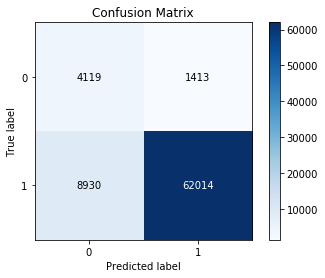

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(std_tf_train,y_tr)
y_pred = DT.predict(std_tf_cv)
print("Accuracy on CV set: %0.3f%%"%(accuracy_score(y_cv, y_pred)*100))
print("Precision on CV set: %0.3f"%(precision_score(y_cv, y_pred,average="weighted")*100))
print("Recall on CV set: %0.3f"%(recall_score(y_cv, y_pred,average="weighted")*100))
print("F1-Score on CV set: %0.3f"%(f1_score(y_cv, y_pred,average="weighted")*100))
print("Confusion Matrix of CV set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_cv)

Accuracy on test set: 85.941%
Precision on test set: 84.593
Recall on test set: 85.941
F1-Score on test set: 83.410
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



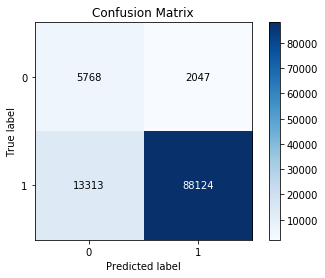

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(std_tf_train,y_tr)
y_pred = DT.predict(std_tf_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average="weighted")*100))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average="weighted")*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average="weighted")*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_test)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer  #tf is calculated by no of wi occurs in rj/no of words in rj 
from sklearn.feature_extraction.text import TfidfVectorizer    #idf is calculated by no of docs/docs which contains wi                                                 
tf_idf_vect1 = TfidfVectorizer(ngram_range=(1,2)).fit(X_tr["cleaned_data"])#tfidf=tf*idf
#final_tfidf1 = tf_idf_vect.fit(X_tr["cleaned_data"].values)
tfidf_train1=tf_idf_vect1.transform(X_tr["cleaned_data"])
tfidf_test1=tf_idf_vect1.transform(X_test["cleaned_data"])
tfidf_cv1=tf_idf_vect1.transform(X_cv["cleaned_data"])

In [40]:
dictionary = dict(zip(tf_idf_vect1.get_feature_names(), list(tf_idf_vect1.idf_)))

In [41]:
#AVG TFIDF W2V
tfidf_feat = tf_idf_vect1.get_feature_names() 

tfidf_sent_vectors = [];
row=0;
for sent in X_tr["cleaned_data"]: 
    sent_vec = np.zeros(200) 
    weight_sum =0; 
    #print(sent)
    for word in sent.split(): 
       # print(word)
        if word in w2v_words:
            vec = w2v_model.wv[word]
            #tf_idf = tfidf_train[row, tfidf_feat.index(word)]
            tf_idf = dictionary[word]*sent.count(word)
           # print(tf_idf)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
       # print(sent_vec)
    tfidf_sent_vectors.append(sent_vec)
   # print(sent_vec)
    row += 1

In [42]:

tfidf_sent_vectors_test = [];
row=0;
for sent in X_test["cleaned_data"]: 
    sent_vec = np.zeros(200) 
    weight_sum =0; 
    for word in sent.split(): 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

In [43]:

tfidf_sent_vectors_cv = [];
row=0;
for sent in X_cv["cleaned_data"]: 
    sent_vec = np.zeros(200) 
    weight_sum =0; 
    for word in sent.split(): 
        #print(word)
        if word in w2v_words:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1
#print(tfidf_sent_vectors_cv)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

DT = DecisionTreeClassifier()

param_grid = {'max_depth':range(1,30,4)} #params we need to try on classifier
gsv = GridSearchCV(DT,param_grid,cv=5,scoring="f1")
clf=gsv.fit(tfidf_sent_vectors,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Best HyperParameter:  {'max_depth': 5}
Best Accuracy: 92.54%


In [45]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
from sklearn import tree
from sklearn.externals.six import StringIO
clf1=DT.fit(tfidf_sent_vectors,y_tr)
dot_data = StringIO()
cl=tree.export_graphviz(clf1,out_file=dot_data,max_depth=2) 

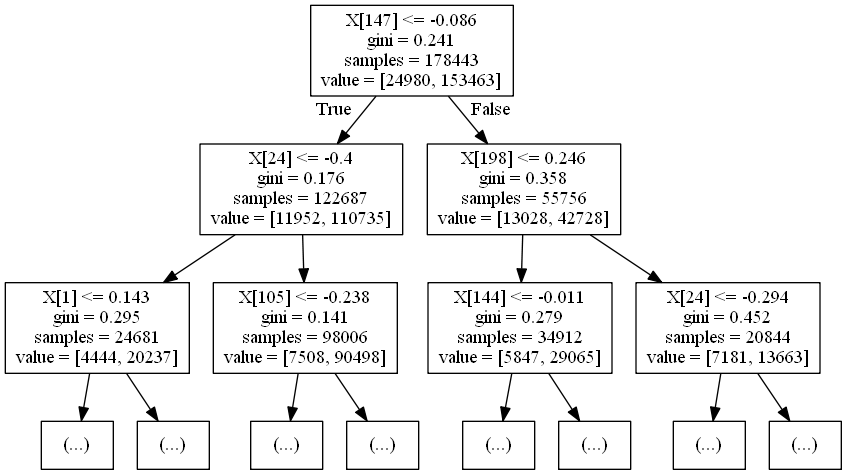

In [46]:
from IPython.display import Image
import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png()) 

K value in Kfold is: 9


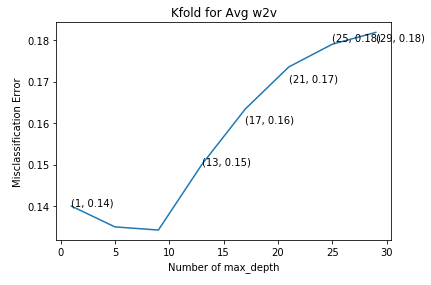

In [47]:
cv_score=[]
for k in mylist:# my list contains odd from 1 to 30
    clf=DecisionTreeClassifier(max_depth=k)
    score=cross_val_score(clf,tfidf_sent_vectors,y_tr,cv=10,scoring="accuracy")#here i am using my X and Y as X_tr and y_tr
    #print(score)
    cv_score.append(score.mean())#score gives as 10 score for each odd numbers so we should take score.mean()and store it in cv_score
import matplotlib.pyplot as plt
#print(cv_score)
MSE=[1-x for x in cv_score]
optimal_k = mylist[MSE.index(min(MSE))]
print("K value in Kfold is:",optimal_k)
plt.plot(mylist,MSE)
for xy in zip(mylist, np.round(MSE,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("Number of max_depth")
plt.ylabel("Misclassification Error")
plt.title("Kfold for Avg w2v")
plt.show()

Accuracy on test set: 84.594%
Precision on test set: 82.165
Recall on test set: 84.594
F1-Score on test set: 82.043
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



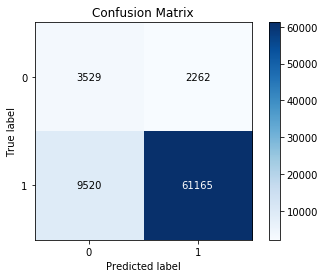

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(tfidf_sent_vectors,y_tr)
y_pred = DT.predict(tfidf_sent_vectors_cv)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_cv, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_cv, y_pred,average="weighted")*100))
print("Recall on test set: %0.3f"%(recall_score(y_cv, y_pred,average="weighted")*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_cv, y_pred,average="weighted")*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_cv)

Accuracy on test set: 84.248%
Precision on test set: 81.808
Recall on test set: 84.248
F1-Score on test set: 81.665
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



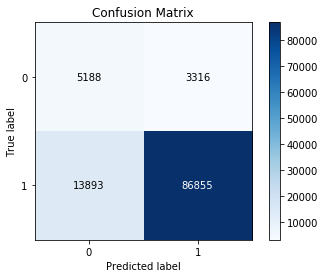

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
import scikitplot.metrics as skplt
DT = DecisionTreeClassifier(max_depth=optimal_k)
DT.fit(tfidf_sent_vectors,y_tr)
y_pred = DT.predict(tfidf_sent_vectors_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average="weighted")*100))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average="weighted")*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average="weighted")*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
skplt.plot_confusion_matrix(y_pred,y_test)

In [52]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model","vectorizer","MAX_DEPTH","Train_error", "Test_error","F1 score(train)","F1(Test)"]

x.add_row(["Decision Tree","AVGW2V","depth=9","15%","15%","84.4%","83.6%"])
x.add_row(["Decision Tree","AVGW2VTFIDF","depth=5","16%","16%","82.16%","81.6%"])
x.add_row(["Decision Tree","TFIDF","depth=21","14%","15%","84.1%","83.41%"])
x.add_row(["Decision Tree","BOW","depth=17","14%","15%","86.05%","85.68%"])

print(x)

+---------------+-------------+-----------+-------------+------------+-----------------+----------+
|     Model     |  vectorizer | MAX_DEPTH | Train_error | Test_error | F1 score(train) | F1(Test) |
+---------------+-------------+-----------+-------------+------------+-----------------+----------+
| Decision Tree |    AVGW2V   |  depth=9  |     15%     |    15%     |      84.4%      |  83.6%   |
| Decision Tree | AVGW2VTFIDF |  depth=5  |     16%     |    16%     |      82.16%     |  81.6%   |
| Decision Tree |    TFIDF    |  depth=21 |     14%     |    15%     |      84.1%      |  83.41%  |
| Decision Tree |     BOW     |  depth=17 |     14%     |    15%     |      86.05%     |  85.68%  |
+---------------+-------------+-----------+-------------+------------+-----------------+----------+


# CONCLUSION
                        1)Decision Trees on Uni-gram, bi-gram and tfidf would have taken forever if had taken all the        
     dimensions as it had huge dimension 
                        2)UNIGRAM Featurization(max_depth=17) gave the best results with accuracy of 86% and F1-score of         
     84.1%
                        3)Graphical visualization of Decison trees gives us the better understanding of this dataset and
       also we can see how it works